In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
# listen_count = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/LFM-1b_LEs.txt',sep='\t',names=['user_id', 'artist_id','album_id','track_id','listen_count'])
listen_count = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/LFM-1b_LEs.txt',sep='\t',names=['user_id', 'artist_id','album_id','track_id','timestamp'],nrows=300000000)

In [ ]:
track = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/LFM-1b_tracks.txt',sep='\t',names=['track_id','track_name', 'artist_id'])

In [ ]:
artist = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/LFM-1b_artists.txt',sep='\t',names=['artist_id','artist_name'])

In [ ]:
song_lyrics = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/songdata.csv')

In [ ]:
song_tag = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/LFM-2b_tags_fixed.csv')
song_tag.head()

,Unnamed: 0,tags,i,artist,track
0,0,"{'indie': 100, 'alternative': 79, 'electronic'...",36346257,Gotye,Somebody That I Used to Know
1,1,"{'soul': 100, 'Adele': 95, 'female vocalists':...",33619193,Adele,Rolling in the Deep
2,2,"{'indie': 100, 'rock': 97, 'alternative': 94, ...",32496162,Imagine Dragons,Radioactive
3,3,"{'female vocalists': 100, 'pop': 96, 'indie': ...",43433165,Lana Del Rey,Video Games
4,4,"{'indie': 100, 'indie pop': 69, 'catchy': 38, ...",32083560,Foster the People,Pumped Up Kicks


In [ ]:
# song_tag.drop(columns=['Unnamed: 0'],inplace=True)
song_tag.columns = ['tags','i','artist_name','track_name']

ValueError: ignored

In [ ]:
print(listen_count.shape)
print(artist.shape)
print(track.shape)
print(song_lyrics.shape)
print(song_tag.shape)

(300000000, 5)
(3169572, 2)
(32135384, 3)
(57650, 4)
(2230814, 5)


In [ ]:
song = pd.merge(artist,track,on='artist_id',how='inner')
song.shape

(32028029, 4)

In [ ]:
song.head()

,artist_id,artist_name,track_id,track_name
0,1,Megadeth,2,Hangar 18
1,1,Megadeth,8,Tornado Of Souls
2,1,Megadeth,1524,Captive Honour
3,1,Megadeth,1782,Back In the Day
4,1,Megadeth,1784,Train of Consequences


In [ ]:
song_lyrics.columns = ['artist_name','track_name','link','text']

In [ ]:
song_merge = pd.merge(song,song_lyrics,on=['artist_name','track_name'],how='inner')

In [ ]:
song_merge.shape

(47331, 6)

In [ ]:
song_merge.head()

,artist_id,artist_name,track_id,track_name,link,text
0,1,Megadeth,2,Hangar 18,/m/megadeth/hangar+18_20091436.html,Welcome to our fortress tall \nTake some time...
1,1,Megadeth,18989869,Hangar 18,/m/megadeth/hangar+18_20091436.html,Welcome to our fortress tall \nTake some time...
2,1,Megadeth,19621438,Hangar 18,/m/megadeth/hangar+18_20091436.html,Welcome to our fortress tall \nTake some time...
3,1,Megadeth,8,Tornado Of Souls,/m/megadeth/tornado+of+souls_20091444.html,This morning I made the call \nThe one that e...
4,1,Megadeth,1524,Captive Honour,/m/megadeth/captive+honour_20091357.html,"Madness comes, and madness goes \nAn insane p..."


In [ ]:
# 중복된 행 제거
song_unique = song_merge.drop_duplicates(subset=['artist_id', 'track_name'])

In [ ]:
song_unique.shape

(39702, 6)

In [ ]:
song_unique.drop(columns='link',inplace=True)
song_unique.head()

<ipython-input-22-bb2f5314e52d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_unique.drop(columns='link',inplace=True)


,artist_id,artist_name,track_id,track_name,text
0,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...
3,1,Megadeth,8,Tornado Of Souls,This morning I made the call \nThe one that e...
4,1,Megadeth,1524,Captive Honour,"Madness comes, and madness goes \nAn insane p..."
5,1,Megadeth,1785,Reckoning Day,I like the way that I make you itch \nAnd all...
6,1,Megadeth,1787,Family Tree,Forgotten things remembered \nThe tigers eat ...


In [ ]:
listen_count.head()

,user_id,artist_id,album_id,track_id,timestamp
0,31435741,2,4,4,1385212958
1,31435741,2,4,4,1385212642
2,31435741,2,4,4,1385212325
3,31435741,2,4,4,1385209508
4,31435741,2,4,4,1385209191


In [ ]:
song_unique_listen = pd.merge(song_unique,listen_count,on='track_id',how='inner')
song_unique_listen.shape

(16641780, 9)

In [ ]:
song_unique_listen['track_id'].nunique()

36604

In [ ]:
# timestamp 열 제거
song_listen = song_unique_listen.drop(columns=['timestamp'])

# user_id와 track_id를 기준으로 그룹화하고 count()를 사용하여 듣은 횟수 계산
user_track_counts = song_listen.groupby(['user_id', 'track_id']).size().reset_index(name='listen_count')

# 기존 DataFrame과 새로운 DataFrame을 merge하여 병합
song_listen_merged = pd.merge(song_listen, user_track_counts, on=['user_id', 'track_id'], how='left')

# 결과 출력
song_listen_merged.shape

(16641780, 9)

In [ ]:
# 중복 제거
merged_unique = song_listen_merged.drop_duplicates(subset=['user_id', 'track_id'])

# 결과 출력
merged_unique.shape

(4672424, 9)

In [ ]:
merged_unique.drop(columns=['artist_id_y'],inplace=True)
merged_unique.columns = ['artist_id','artist_name','track_id','track_name','text','user_id','album_id','listen_count']

<ipython-input-39-cdf0d239a3b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_unique['listen_count_bin'] = pd.cut(merged_unique['listen_count'], bins=bins, labels=labels)


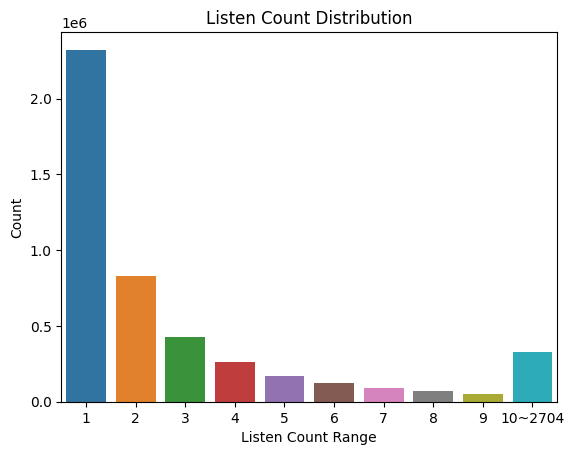

In [ ]:
# listen_count 기준으로 나누어서 시각화
bins = [0,1,2,3,4,5,6,7,8,9,2705]#20,30,40,50,60,70,80,90,100,1000]
labels = ['1','2','3','4','5','6','7','8','9','10~2704']#'20','30','40','50','60','70','80','90','100','1000']

merged_unique['listen_count_bin'] = pd.cut(merged_unique['listen_count'], bins=bins, labels=labels)

# seaborn을 사용하여 시각화
sns.countplot(x='listen_count_bin', data=merged_unique)
plt.title('Listen Count Distribution')
plt.xlabel('Listen Count Range')
plt.ylabel('Count')
plt.show()

In [ ]:
listen_count_counts = merged_unique['listen_count_bin'].value_counts().sort_index()
print(listen_count_counts)

1          2323199
2           829608
3           425907
4           259652
5           171104
6           122576
7            88625
8            68866
9            53889
10~2704     328998
Name: listen_count_bin, dtype: int64


In [ ]:
merged_unique.shape

(4672424, 9)

In [ ]:
merged_unique.head()

,artist_id,artist_name,track_id,track_name,text,user_id,album_id,listen_count,listen_count_bin
0,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,2,9,9
5,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,32226961,2,14,10~2704
23,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,2115525,2,16,10~2704
39,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,4812967,2113,4,4
43,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21211675,2,1,1


In [ ]:
song_tag.drop(columns=['Unnamed: 0'],inplace=True)
song_tag.columns = ['tags','i','artist_name','track_name']

In [ ]:
song_tag.head()

,tags,i,artist_name,track_name
0,"{'indie': 100, 'alternative': 79, 'electronic'...",36346257,Gotye,Somebody That I Used to Know
1,"{'soul': 100, 'Adele': 95, 'female vocalists':...",33619193,Adele,Rolling in the Deep
2,"{'indie': 100, 'rock': 97, 'alternative': 94, ...",32496162,Imagine Dragons,Radioactive
3,"{'female vocalists': 100, 'pop': 96, 'indie': ...",43433165,Lana Del Rey,Video Games
4,"{'indie': 100, 'indie pop': 69, 'catchy': 38, ...",32083560,Foster the People,Pumped Up Kicks


In [ ]:
merged_last = pd.merge(merged_unique,song_tag,on=['track_name','artist_name'],how='inner')
merged_last.shape

(4654011, 11)

In [ ]:
merged_last.head()

,artist_id,artist_name,track_id,track_name,text,user_id,album_id,listen_count,listen_count_bin,tags,i
0,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,2,9,9,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
1,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,32226961,2,14,10~2704,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
2,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,2115525,2,16,10~2704,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
3,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,4812967,2113,4,4,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
4,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21211675,2,1,1,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134


In [ ]:
song_tag.head()

,tags,i,artist_name,track_name
0,"{'indie': 100, 'alternative': 79, 'electronic'...",36346257,Gotye,Somebody That I Used to Know
1,"{'soul': 100, 'Adele': 95, 'female vocalists':...",33619193,Adele,Rolling in the Deep
2,"{'indie': 100, 'rock': 97, 'alternative': 94, ...",32496162,Imagine Dragons,Radioactive
3,"{'female vocalists': 100, 'pop': 96, 'indie': ...",43433165,Lana Del Rey,Video Games
4,"{'indie': 100, 'indie pop': 69, 'catchy': 38, ...",32083560,Foster the People,Pumped Up Kicks


In [ ]:
subset = merged_last[['artist_name','track_name','tags']]

In [ ]:
subset.shape

(4654011, 3)

In [ ]:
song_tag_2 = subset.drop_duplicates(subset='track_name', keep='first')
song_tag_2.shape

(25144, 3)

In [ ]:
unique_tracks_df.head()

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
song_tag = song_tag_2
# 문자열 형식의 JSON을 파이썬 딕셔너리로 변환하는 함수
def convert_to_dict(tag_str):
    try:
        return json.loads(tag_str.replace("'", "\""))
    except json.JSONDecodeError:
        return {}

# 태그 컬럼을 딕셔너리로 변환
# song_tag['tags'] = song_tag['tags'].apply(convert_to_dict)

# 각 트랙의 태그에서 상위 5개의 태그만 남기기
song_tag['tags'] = song_tag['tags'].apply(lambda x: dict(sorted(x.items(), key=lambda item: item[1], reverse=True)[:5]))

# Content-Based 추천을 위한 TF-IDF 행렬 생성
tags_str = song_tag['tags'].apply(lambda x: ' '.join(x.keys()))
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tags_str)

# Cosine Similarity 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 추천을 위한 함수 정의
def recommend_content_based(track_index, cosine_sim_matrix, df, top_n=5):
    # 선택한 트랙의 코사인 유사도 벡터 가져오기
    sim_scores = list(enumerate(cosine_sim_matrix[track_index]))

    # 유사도에 따라 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 상위 N개 트랙 인덱스 가져오기
    top_indices = [i for i, _ in sim_scores[1:top_n+1]]  # 첫 번째는 자기 자신이므로 제외

    # 상위 N개 트랙 정보 및 태그 출력
    recommended_tracks = df.iloc[top_indices][['artist_name', 'track_name', 'tags']]

    return recommended_tracks

# 예시: 첫 번째 트랙을 기준으로 Content-Based 추천 수행
track_index = 24000
recommendations = recommend_content_based(track_index, cosine_sim, song_tag)

# 결과 출력
print(f"Recommendations based on '{song_tag.iloc[track_index]['artist_name']} - {song_tag.iloc[track_index]['track_name']}':")
print(recommendations)


<ipython-input-85-279dd4de6db5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_tag['tags'] = song_tag['tags'].apply(lambda x: dict(sorted(x.items(), key=lambda item: item[1], reverse=True)[:5]))


Recommendations based on 'Lloyd Cole - No Blue Skies':
        artist_name                               track_name  \
4626091  Lloyd Cole               She's A Girl And I'm A Man   
4626537  Lloyd Cole  I Hate To See You Baby Doing That Stuff   
4626159  Lloyd Cole                       No More Love Songs   
4626437  Lloyd Cole                    The One You Never Had   
4626496  Lloyd Cole                           Let's Get Lost   

                                                      tags  
4626091  {'pop': 100, 'alternative': 60, 'rock': 40, 'L...  
4626537  {'pop': 100, 'rock': 34, 'Lloyd Cole': 34, 'ei...  
4626159  {'alternative': 100, 'singer-songwriter': 80, ...  
4626437  {'indie': 100, 'alternative': 100, 'singer-son...  
4626496  {'chilled': 100, 'feelgood': 100, 'when I was ...  


In [ ]:
song_tag = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/merged_last.csv')

In [ ]:
song_tag.head()

,Unnamed: 0,artist_id,artist_name,track_id,track_name,text,user_id,album_id,listen_count,listen_count_bin,tags,i
0,0,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,2,9,9,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
1,1,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,32226961,2,14,10~2704,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
2,2,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,2115525,2,16,10~2704,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
3,3,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,4812967,2113,4,4,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
4,4,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21211675,2,1,1,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134


In [ ]:
song_tag = song_tag.drop_duplicates(subset='track_name', keep='first')
song_tag.shape

(25144, 12)

In [ ]:
import ast
song_tag['tags'] = song_tag['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 'tags' 열에서 첫 번째 키-값 쌍을 추출하여 'first_tag' 열에 저장
song_tag['first_tag'] = song_tag['tags'].apply(lambda x: next(iter(x.items()), ('', '')) if isinstance(x, dict) else None)

print(song_tag)

         Unnamed: 0  artist_id     artist_name  track_id  \
0                 0          1        Megadeth         2   
1372           1372          1        Megadeth         8   
2453           2453          1        Megadeth      1524   
2974           2974          1        Megadeth      1785   
3527           3527          1        Megadeth      1787   
...             ...        ...             ...       ...   
4654004     4654004     838360         Tiffany  11661398   
4654006     4654006    1374804  Next To Normal  13430827   
4654007     4654007    1374804  Next To Normal  13430837   
4654008     4654008    1374804  Next To Normal  13430948   
4654010     4654010    1374804  Next To Normal  13430969   

                        track_name  \
0                        Hangar 18   
1372              Tornado Of Souls   
2453                Captive Honour   
2974                 Reckoning Day   
3527                   Family Tree   
...                            ...   
4654004  Hold

In [ ]:

# 각 트랙의 태그에서 맨 앞 1개의 태그만 남기기
song_tag['first_tag'] = song_tag['tags'].apply(lambda x: dict(x.keys())[0] if x else None)

# 각 태그의 개수 세기
tag_counts = song_tag['first_tag'].value_counts()

# 결과 출력
print("각 태그의 개수:")
print(tag_counts)

AttributeError: ignored

In [ ]:
song_tag.head()

,artist_name,track_name,tags,first_tag,tag_bin
0,Megadeth,Hangar 18,"{'thrash metal': 100, 'metal': 46, 'heavy meta...","[thrash metal, metal, heavy metal]",100-1000
1372,Megadeth,Tornado Of Souls,"{'thrash metal': 100, 'metal': 42, 'heavy meta...","[thrash metal, metal, heavy metal]",100-1000
2453,Megadeth,Captive Honour,"{'thrash metal': 100, 'heavy metal': 62, 'meta...","[thrash metal, heavy metal, metal]",100-1000
2974,Megadeth,Reckoning Day,"{'thrash metal': 100, 'heavy metal': 70, 'meta...","[thrash metal, heavy metal, metal]",100-1000
3527,Megadeth,Family Tree,"{'heavy metal': 100, 'thrash metal': 100, 'met...","[heavy metal, thrash metal, metal]",100-1000


In [ ]:
first_tag_dict = song_tag['tags'].apply(lambda x: ast.literal_eval(x)).apply(lambda x: next(iter(x.items()), ('', '')))

print("First key-value pair in 'tag' column for each row:")
print(first_tag_dict)

NameError: ignored

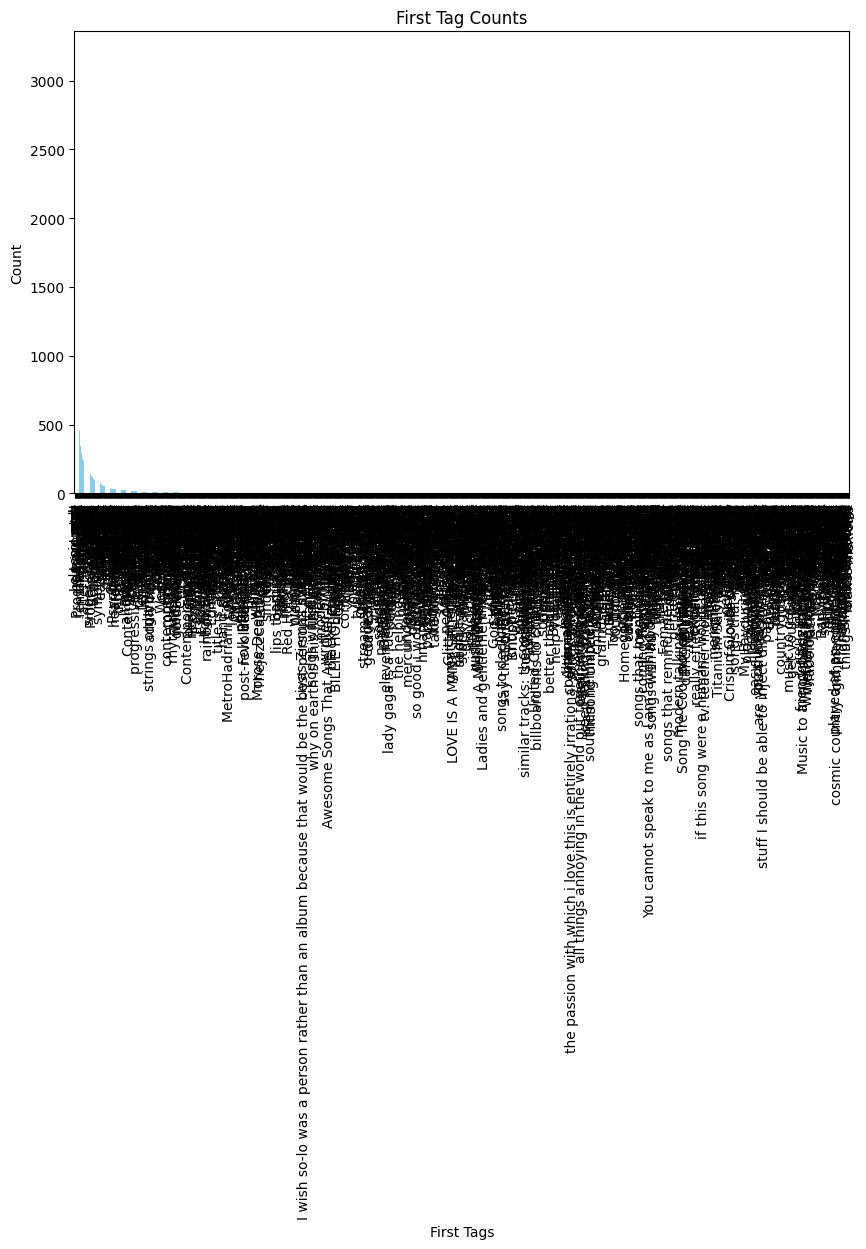

In [ ]:
# 각 태그의 개수 세기
tag_counts = song_tag['first_tag'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='skyblue')
plt.title('First Tag Counts')
plt.xlabel('First Tags')
plt.ylabel('Count')
plt.show()

<ipython-input-100-28c83b2d58bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_tag['tag_bin'] = pd.cut(song_tag['first_tag'].map(tag_counts), bins=bins, labels=bin_labels)


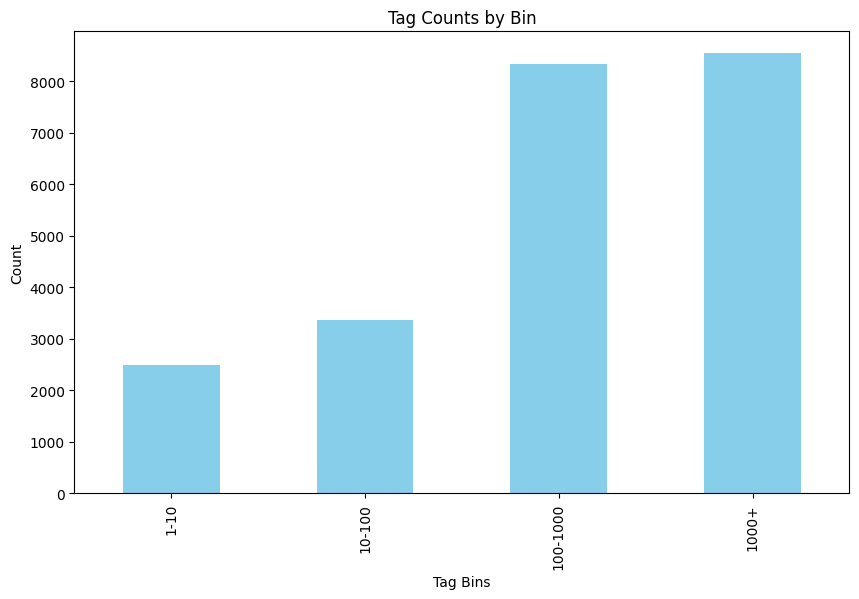

In [ ]:
# 각 태그의 개수 세기
tag_counts = song_tag['first_tag'].value_counts()

# 구간 나누기
bins = [0, 10, 100, 1000, float('inf')]
bin_labels = ['1-10', '10-100', '100-1000', '1000+']
song_tag['tag_bin'] = pd.cut(song_tag['first_tag'].map(tag_counts), bins=bins, labels=bin_labels)

# 각 bin의 개수 세기
bin_counts = song_tag['tag_bin'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
bin_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Tag Counts by Bin')
plt.xlabel('Tag Bins')
plt.ylabel('Count')
plt.show()

<ipython-input-108-2cbd1ca1fd91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_tag['first_tags'] = song_tag['tags'].apply(lambda x: list(x.keys())[:3] if x else [])
<ipython-input-108-2cbd1ca1fd91>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_tag['first_tags'] = song_tag['first_tags'].apply(lambda x: x + ['기타'] * (3 - len(x)))


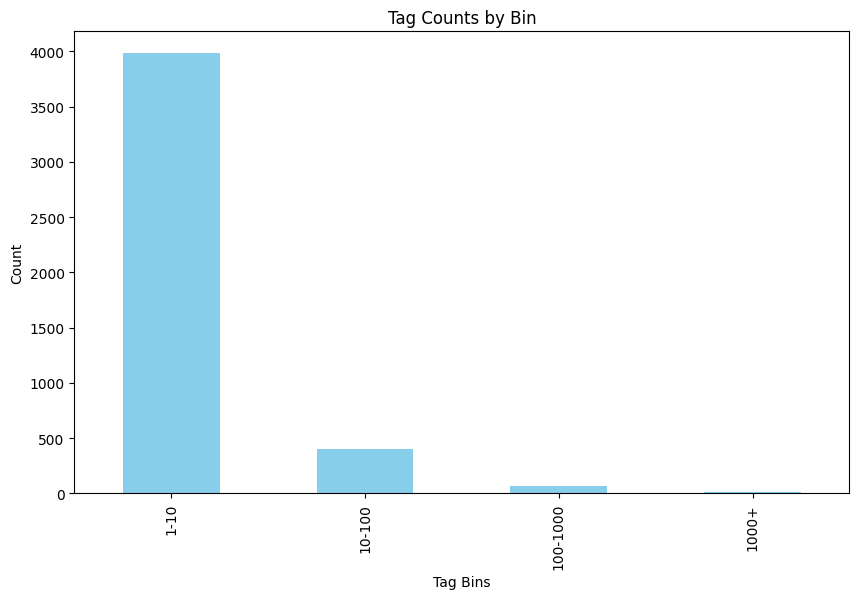

In [ ]:
# 각 트랙의 태그에서 맨 앞 3개의 태그만 남기기
song_tag['first_tags'] = song_tag['tags'].apply(lambda x: list(x.keys())[:3] if x else [])

# '기타' 태그 추가
song_tag['first_tags'] = song_tag['first_tags'].apply(lambda x: x + ['기타'] * (3 - len(x)))

# 각 태그의 개수 세기
tag_counts = pd.Series([tag for tags in song_tag['first_tags'] for tag in tags]).value_counts()

# 구간 나누기
bins = [0, 10, 100, 1000, float('inf')]
bin_labels = ['1-10', '10-100', '100-1000', '1000+']
tag_counts['tag_bin'] = pd.cut(tag_counts, bins=bins, labels=bin_labels)

# 각 bin의 개수 세기
bin_counts = tag_counts['tag_bin'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
bin_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Tag Counts by Bin')
plt.xlabel('Tag Bins')
plt.ylabel('Count')
plt.show()

In [ ]:
song_tag.head()

,artist_name,track_name,tags,first_tag,tag_bin,first_tags
0,Megadeth,Hangar 18,"{'thrash metal': 100, 'metal': 46, 'heavy meta...","[thrash metal, metal, heavy metal]",100-1000,"[thrash metal, metal, heavy metal]"
1372,Megadeth,Tornado Of Souls,"{'thrash metal': 100, 'metal': 42, 'heavy meta...","[thrash metal, metal, heavy metal]",100-1000,"[thrash metal, metal, heavy metal]"
2453,Megadeth,Captive Honour,"{'thrash metal': 100, 'heavy metal': 62, 'meta...","[thrash metal, heavy metal, metal]",100-1000,"[thrash metal, heavy metal, metal]"
2974,Megadeth,Reckoning Day,"{'thrash metal': 100, 'heavy metal': 70, 'meta...","[thrash metal, heavy metal, metal]",100-1000,"[thrash metal, heavy metal, metal]"
3527,Megadeth,Family Tree,"{'heavy metal': 100, 'thrash metal': 100, 'met...","[heavy metal, thrash metal, metal]",100-1000,"[heavy metal, thrash metal, metal]"


In [ ]:
tag_counts.to_csv('/content/drive/MyDrive/집교 2_Team P/tag_counts_3.csv')